In this project, we want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [9]:
import pandas as pd
import numpy as np
#dete survey
print('about dete survey')
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.info()
print(dete_survey.head())
dete_survey.isnull()
dete_survey.value_counts()
#tafe survey
print('about tafe survey')
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.info()
print(tafe_survey.head())
tafe_survey.value_counts()


about dete survey
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sect

Record ID     Institute                              WorkArea                  CESSATION YEAR  Reason for ceasing employment  Contributing Factors. Career Move - Public Sector   Contributing Factors. Career Move - Private Sector   Contributing Factors. Career Move - Self-employment  Contributing Factors. Ill Health  Contributing Factors. Maternity/Family  Contributing Factors. Dissatisfaction   Contributing Factors. Job Dissatisfaction  Contributing Factors. Interpersonal Conflict  Contributing Factors. Study  Contributing Factors. Travel  Contributing Factors. Other  Contributing Factors. NONE  Main Factor. Which of these was the main factor for leaving?  InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction  InstituteViews. Topic:2. I was given access to skills training to help me do my job better  InstituteViews. Topic:3. I was given adequate opportunities for personal development  InstituteViews. Topic:4. I was given adequate opportunities for promo

In [14]:
#fill with Nan the columns which has Not Stated
dete_survey= pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
#drop the columns we dont need
dete_survey_updated= dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

print(dete_survey_updated.columns.dtype)
print(tafe_survey_updated.columns.dtype)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [17]:
#rename the columns name
#dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.sptrip().str.replace(' ','_')
print(dete_survey_updated.columns.dtype)
cols = dete_survey_updated.columns
cols = cols.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns = cols
print(dete_survey_updated.columns)
print(dete_survey_updated.head())


update_tafe_col_name = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(update_tafe_col_name, axis=1)
print(tafe_survey_updated.columns)
print(tafe_survey_updated.head())

object
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retireme

In [33]:
#review the unique values in the separationtype column
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [34]:
#review the unique values in the separationtype column
dete_survey_updated['separationtype'].value_counts()


separationtype
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64

In [41]:
#select only the data for survey respondents who have a Resignation separation type
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()


      id separationtype cease_date  dete_start_date  role_start_date  \
3      4    Resignation    05/2012           2005.0           2006.0   
5      6    Resignation    05/2012           1994.0           1997.0   
8      9    Resignation    07/2012           2009.0           2009.0   
9     10    Resignation       2012           1997.0           2008.0   
11    12    Resignation       2012           2009.0           2009.0   
..   ...            ...        ...              ...              ...   
808  810    Resignation    12/2013           2010.0           2010.0   
815  817    Resignation    01/2014           2012.0           2012.0   
816  818    Resignation    01/2014           2012.0           2012.0   
819  821    Resignation    01/2014           2009.0           2009.0   
821  823    Resignation    12/2013              NaN              NaN   

             position classification                region  \
3             Teacher        Primary    Central Queensland   
5    Guidan

In [43]:
#check the unique values in cease date
dete_resignations['cease_date'].value_counts()
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

#check again for outliers
dete_resignations['cease_date'].value_counts()


cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [48]:
#checking for the unique values in dete start date
dete_resignations['dete_start_date'].value_counts().sort_index(ascending= False)



dete_start_date
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: count, dtype: int64

In [47]:
#checking for the unique values in tafe cease_date
tafe_resignations['cease_date'].value_counts().sort_index(ascending= False)

cease_date
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: count, dtype: int64

In [50]:
dete_resignations['institute_service']= dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


In [53]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()



Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [54]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()    
    

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

In [122]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations.apply(lambda x: update_vals(x['Contributing Factors. Dissatisfaction']) or update_vals(x['Contributing Factors. Job Dissatisfaction']), axis=1)

tafe_resignations_up = tafe_resignations.copy()

tafe_resignations['dissatisfied'].value_counts(dropna=False)



dissatisfied
True    340
Name: count, dtype: int64

In [121]:

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                                       'physical_work_environment','lack_of_recognition','lack_of_job_security'
                                                       ,'work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

In [123]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [124]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [125]:
combined_updated['institute_service_up']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up']=combined_updated['institute_service_up'].astype(float)
combined_updated['institute_service_up'].value_counts()


institute_service_up
1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: count, dtype: int64

In [127]:
def transform_service(value):
    if value >=11:
        return 'Veteran'
    elif 7<=value<11 :
        return 'Established'
    elif 3<=value<7:
        return 'Experienced'
    elif pd.isnull(value):
        return np.nan
    else:
        return 'New'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)
combined_updated['service_cat'].value_counts()

service_cat
New            193
Experienced    172
Veteran        136
Established     62
Name: count, dtype: int64

In [129]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
True     489
False    162
Name: count, dtype: int64

<Axes: xlabel='service_cat'>

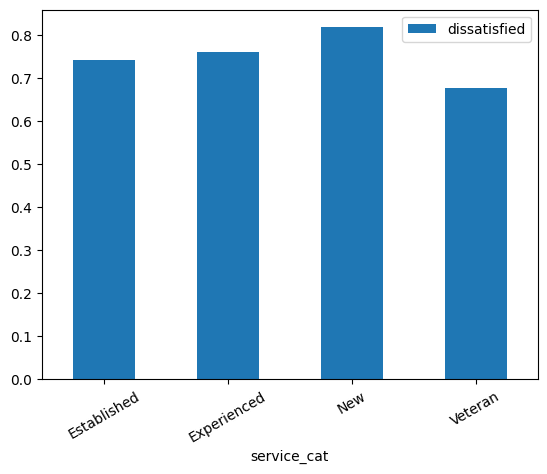

In [133]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

%matplotlib inline
dis_pct.plot(kind='bar', rot=30)
